In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## KMeans incl. correlation matrix + dropping features

In [2]:
df = pd.read_csv("/Users/luisi/Downloads/Data/features_3_sec.csv") 
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.shape

(9990, 60)

In [4]:
# Step 1: Features
df_features = df.drop(["label", "filename", "length"], axis = 1)
df_features.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [5]:
# Step 2: Feature Scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns = df_features.columns)
X_scaled.head(3)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062


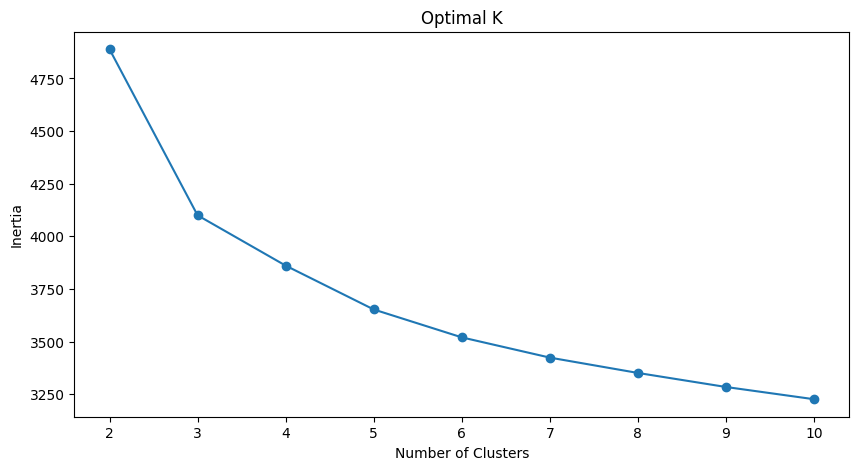

In [6]:
# Baseline optimal K
inertia0 = []
cluster = range(2, 11)

for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia0.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(cluster, inertia0, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Optimal K")
plt.show()

## Correlation Matrix

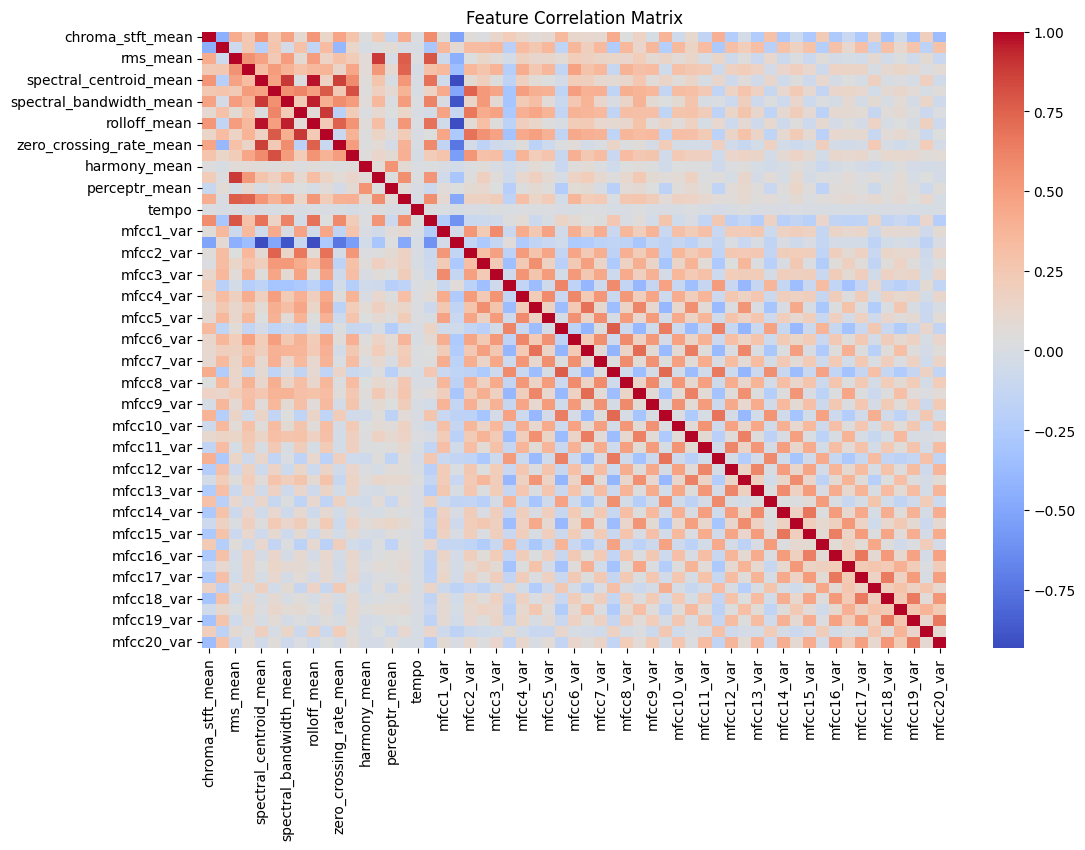

In [7]:
# Step 3: Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [8]:
# Correlation Matrix 
corr_matrix = X_scaled.corr().abs()
corr_matrix

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
chroma_stft_mean,1.000000,0.443757,0.424706,0.243647,0.534670,0.251985,0.464617,0.100909,0.526881,0.138394,...,0.228293,0.264815,0.103968,0.273841,0.168254,0.308342,0.062985,0.313233,0.193666,0.363354
chroma_stft_var,0.443757,1.000000,0.078410,0.251900,0.208136,0.276964,0.031197,0.291007,0.141792,0.330930,...,0.221620,0.296099,0.111544,0.303262,0.171744,0.295359,0.107008,0.277295,0.173398,0.287195
rms_mean,0.424706,0.078410,1.000000,0.553770,0.470781,0.241796,0.495142,0.085760,0.500178,0.157281,...,0.055563,0.032953,0.013952,0.041470,0.087615,0.046180,0.024552,0.062662,0.082251,0.103519
rms_var,0.243647,0.251900,0.553770,1.000000,0.327809,0.509235,0.383329,0.285950,0.350716,0.377474,...,0.064570,0.159390,0.144238,0.144163,0.004785,0.102019,0.136798,0.095054,0.015085,0.073571
spectral_centroid_mean,0.534670,0.208136,0.470781,0.327809,1.000000,0.476959,0.890382,0.021120,0.974360,0.172380,...,0.116866,0.025006,0.026879,0.018358,0.177934,0.006376,0.018651,0.011018,0.191512,0.051205
spectral_centroid_var,0.251985,0.276964,0.241796,0.509235,0.476959,1.000000,0.556491,0.614254,0.492965,0.780308,...,0.134131,0.125906,0.134869,0.115752,0.045517,0.093684,0.123857,0.074366,0.012324,0.052981
spectral_bandwidth_mean,0.464617,0.031197,0.495142,0.383329,0.890382,0.556491,1.000000,0.223836,0.951000,0.406680,...,0.012459,0.023060,0.089523,0.021857,0.084331,0.005564,0.074453,0.020422,0.133895,0.063954
spectral_bandwidth_var,0.100909,0.291007,0.085760,0.285950,0.021120,0.614254,0.223836,1.000000,0.070097,0.891339,...,0.180031,0.101519,0.093049,0.078486,0.122140,0.051146,0.094140,0.022953,0.091730,0.015888
rolloff_mean,0.526881,0.141792,0.500178,0.350716,0.974360,0.492965,0.951000,0.070097,1.000000,0.237905,...,0.098611,0.032600,0.035871,0.026397,0.158802,0.012166,0.033071,0.020990,0.182626,0.065557
rolloff_var,0.138394,0.330930,0.157281,0.377474,0.172380,0.780308,0.406680,0.891339,0.237905,1.000000,...,0.188433,0.112760,0.099636,0.095440,0.110838,0.069654,0.094853,0.044384,0.090789,0.031120


In [9]:
# Finding the highest correlations 
corr_read = corr_matrix.unstack().reset_index()
corr_read.columns = ["Feature 1", "Feature 2", "Correlation"]
corr_read = corr_read[corr_read["Feature 1"] != corr_read["Feature 2"]]
corr_sorted = corr_read.sort_values(by = "Correlation", ascending=False)
corr_sorted.head(20)

,Feature 1,Feature 2,Correlation
460,rolloff_mean,spectral_centroid_mean,0.974360
236,spectral_centroid_mean,rolloff_mean,0.974360
350,spectral_bandwidth_mean,rolloff_mean,0.951000
462,rolloff_mean,spectral_bandwidth_mean,0.951000
247,spectral_centroid_mean,mfcc2_mean,0.931435
1087,mfcc2_mean,spectral_centroid_mean,0.931435
1091,mfcc2_mean,rolloff_mean,0.923652
475,rolloff_mean,mfcc2_mean,0.923652
520,rolloff_var,spectral_bandwidth_var,0.891339
408,spectral_bandwidth_var,rolloff_var,0.891339


## Feature Dropping

In [10]:
# Dropping features with high correlations 
df_reduced = X_scaled.drop(["rolloff_mean"], axis = 1)

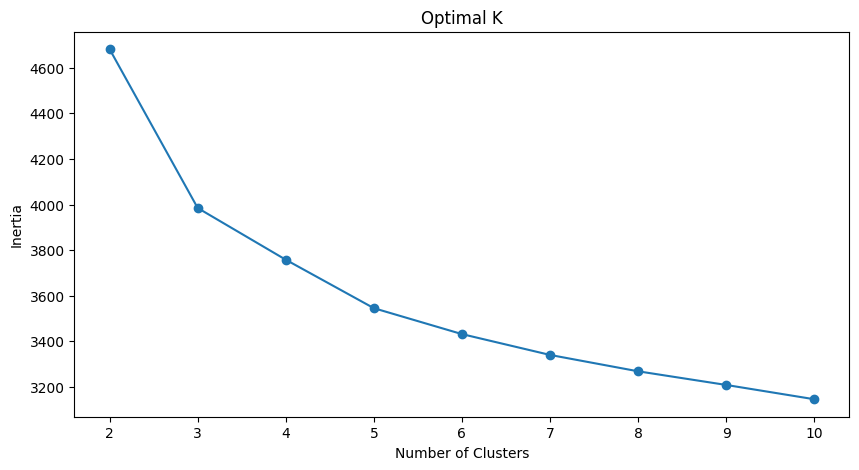

In [11]:
# Step 5: Finding Optimal K 
inertia = []
cluster = range(2, 11)

for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_reduced)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(cluster, inertia, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Optimal K")
plt.show()

In [12]:
# Dropping features with high correlations 
df_reduced2 = X_scaled.drop(["rolloff_mean","spectral_bandwidth_mean"], axis = 1)

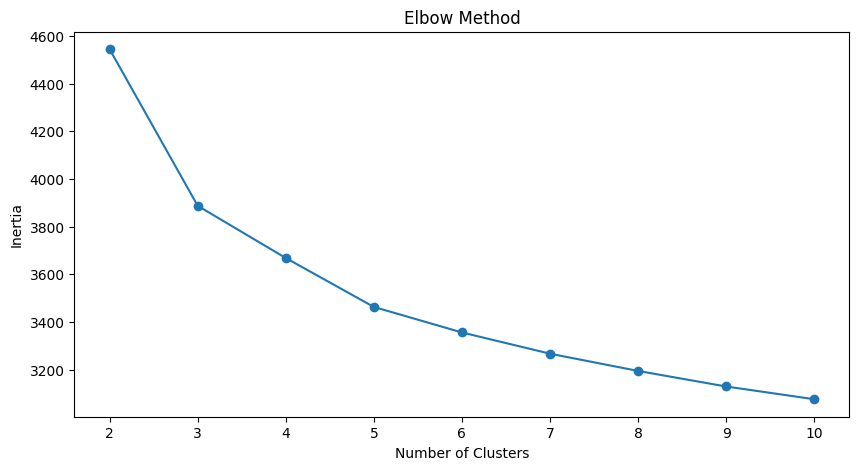

In [13]:
inertia2 = []
cluster = range(2, 11)

for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_reduced2)
    inertia2.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(cluster, inertia2, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [14]:
# Dropping features with high correlations 
df_reduced3 = X_scaled.drop(["rolloff_mean","spectral_bandwidth_mean", "mfcc2_mean"], axis = 1)

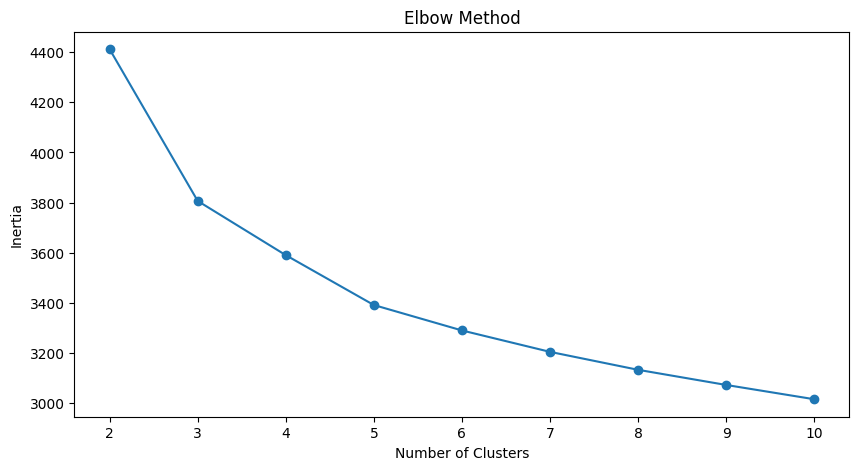

In [15]:
inertia3 = []
cluster = range(2, 11)

for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_reduced3)
    inertia3.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(cluster, inertia3, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

## Applying K-Means with optimal K

In [16]:
# Step 6: Applying K-Means with optimal K 
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_reduced3)
df.head(1)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,cluster
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,-3.24128,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues,1


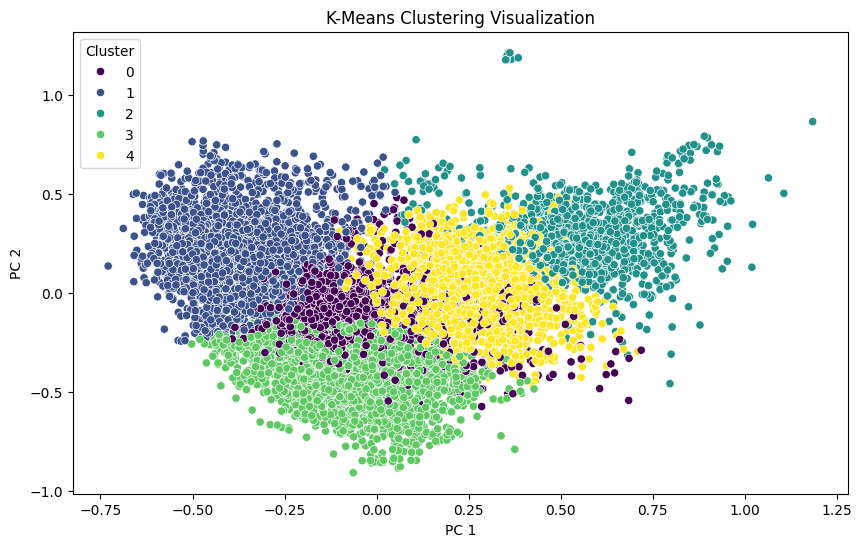

In [17]:
# Step 5: Visualizing Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_reduced3)

df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["cluster"] = df["cluster"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df["cluster"], palette="viridis")
plt.title("K-Means Clustering Visualization")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.show()

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# 1. Silhouette Score -> Measures how well-separated clusters are. Values range from -1 to 1 (higher is better).
silhouette_avg = silhouette_score(df_reduced3, df["cluster"])
print(f"Silhouette Score: {silhouette_avg:}")

# 2. Cosine Similarity -> Within Clusters Checks if music samples in the same cluster are perceptually similar
cluster_similarities = {}
for cluster in df["cluster"].unique():
    cluster_points = df_reduced3[df["cluster"] == cluster]
    if len(cluster_points) > 1:
        similarity_matrix = cosine_similarity(cluster_points)
        avg_similarity = np.mean(similarity_matrix)
        cluster_similarities[cluster] = avg_similarity

print("\nAverage Cosine Similarity Per Cluster:")
for cluster, sim in cluster_similarities.items():
    print(f"Cluster {cluster}: {sim:}")

Silhouette Score: 0.15674580319355974

Average Cosine Similarity Per Cluster:
Cluster 1: 0.9653115379512622
Cluster 0: 0.9433281419119669
Cluster 3: 0.9352951300394543
Cluster 2: 0.9463861195612155
Cluster 4: 0.9615393165157993


In [19]:
km = KMeans(n_clusters = 10) 
km.fit(X_scaled)
km.cluster_centers_.shape

(10, 57)

In [20]:
km.labels_

array([5, 5, 5, ..., 9, 5, 5], shape=(9990,), dtype=int32)

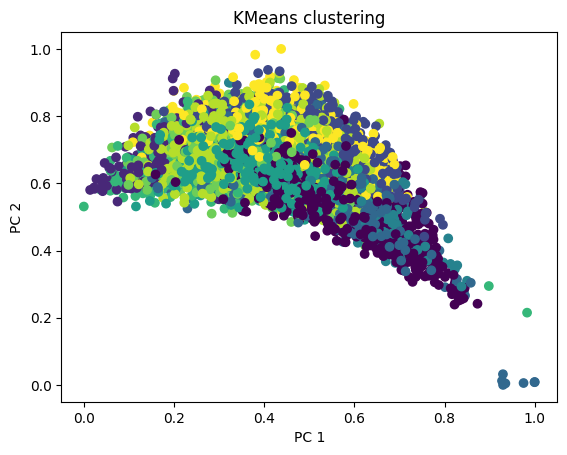

In [21]:
plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], c=km.labels_)
plt.title("KMeans clustering"); plt.xlabel("PC 1"); plt.ylabel("PC 2");

In [22]:
# Step 4: Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) #df_reduced when feature selection is complete
pca.explained_variance_ratio_  # total variance of the PC1 and PCA 2

array([0.26745621, 0.18238003])

In [23]:
pca.explained_variance_ratio_.sum()

np.float64(0.44983624401319533)

ONLY 33% variance explained :(

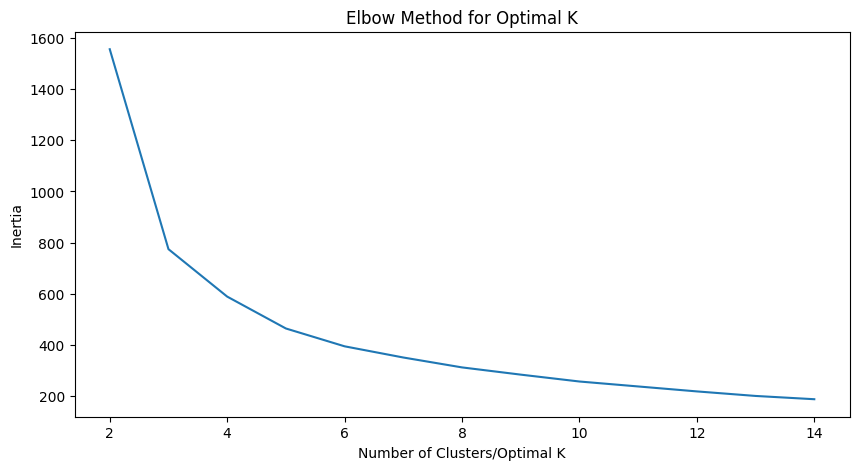

In [24]:
# Step 5: Finding Optimal K for K-Means
inertia = []
clusters = range(2, 15)

for k in clusters:
    km = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(clusters, inertia)
plt.xlabel("Number of Clusters/Optimal K")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

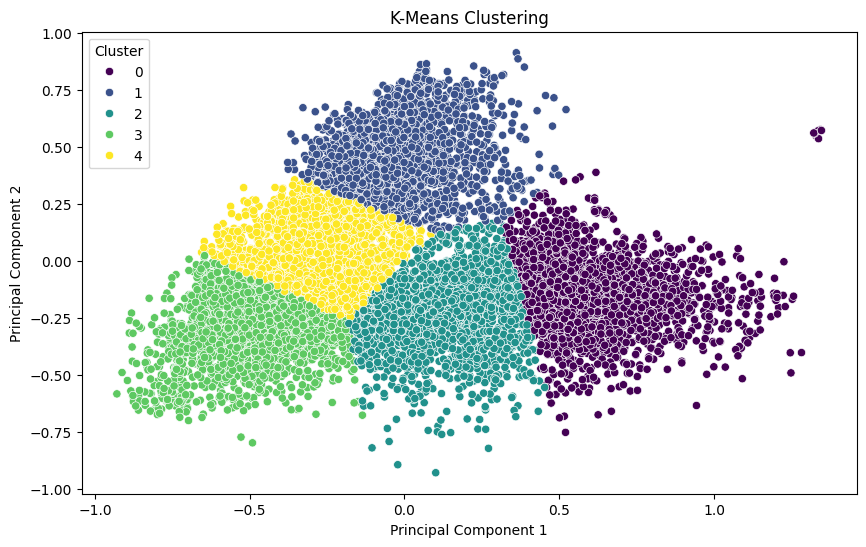

In [25]:
# Step 6: Applying K-Means with optimal K 
optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_pca)

df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y = df_pca.iloc[:, 1], hue = df["Cluster"], palette = "viridis")
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [26]:
# Step 7: Finding Important Features for Clustering
feature_importance = pd.DataFrame({'Feature': df_pca.columns, 'Importance': np.abs(kmeans.cluster_centers_).mean(axis=0)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
display(feature_importance.head(10))

,Feature,Importance
0,PC1,0.314773
1,PC2,0.244793


PC 1-3: contributes the most 

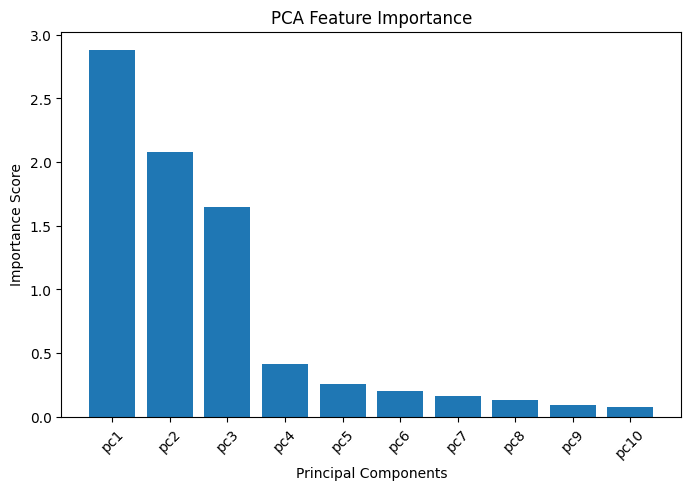

In [27]:
importance_values = [2.88, 2.08, 1.65, 0.41, 0.26, 0.20, 0.16, 0.13, 0.09, 0.08]
components = [f"pc{i+1}" for i in range(len(importance_values))]

plt.figure(figsize=(8, 5))
plt.bar(components, importance_values)
plt.xlabel("Principal Components")
plt.ylabel("Importance Score")
plt.title("PCA Feature Importance")
plt.xticks(rotation=45)
plt.show()